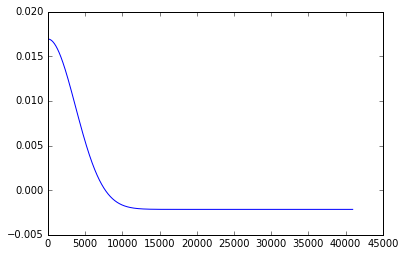

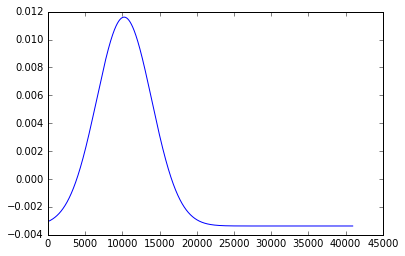

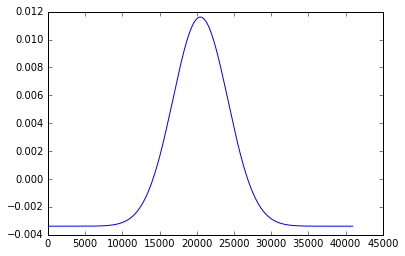

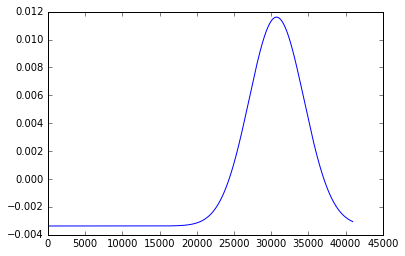

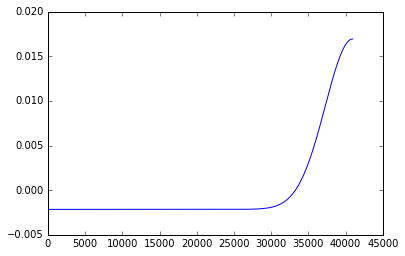

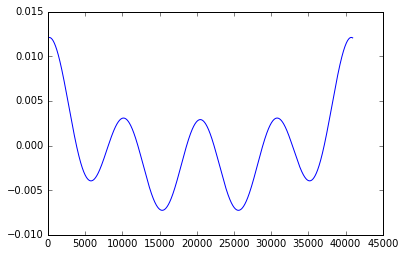

[('WheelDir.BACKWARDS', -0.17509764655669208), ('agent.wheels.right', -0.0020319939352300459), ('agent.wheels.left', -0.0039244131231999163), ('WheelDir.FORWARDS', 0.14762862510607547)]
[('WheelDir.BACKWARDS', -0.13221397444479938), ('agent.wheels.right', 0.0052388954773951802), ('agent.wheels.left', -0.0021249029523580779), ('WheelDir.FORWARDS', 0.097753585832643514)]
asdasd
[('WheelDir.BACKWARDS', -0.12104224925913055), ('agent.wheels.right', -0.0040326228942479123), ('obj1', -0.0016827911015961812), ('agent.wheels.left', -0.0078826403698597468), ('WheelDir.FORWARDS', 0.11015048363742662)]
[('WheelDir.BACKWARDS', -0.10151305092469885), ('agent.wheels.right', 0.0095049695227419004), ('obj1', -0.00072075781340960013), ('agent.wheels.left', -0.0039805733833142721), ('WheelDir.FORWARDS', 0.071039299806941111)]


In [34]:
from hrr import HRR
%matplotlib inline

HRR.set_size(40960)
HRR.valid_range = zip([0.0], [1.0])

HRR.stddev = 0.09
farleft = HRR(0.0)
left = HRR(0.25)
front = HRR(0.5)
right = HRR(0.75)
farright = HRR(1.0)
HRR.stddeev = 0.02

# test stddev and result
farleft.plot(unpermute=True)
left.plot(unpermute=True)
front.plot(unpermute=True)
right.plot(unpermute=True)
farright.plot(unpermute=True)
temp = farleft + left + front + right + farright
temp.plot(unpermute=True)

left_wheel_backwards = HRR("agent.wheels.left") * HRR("WheelDir.BACKWARDS")
left_wheel_forwards = HRR("agent.wheels.left") * HRR("WheelDir.FORWARDS")
right_wheel_backwards = HRR("agent.wheels.right") * HRR("WheelDir.BACKWARDS")
right_wheel_forwards = HRR("agent.wheels.right") * HRR("WheelDir.FORWARDS")
farleft_ctl = (farleft * left_wheel_backwards) + (farleft * right_wheel_forwards)
left_ctl = (left * left_wheel_backwards) + (left * right_wheel_forwards)
front_ctl = (front * left_wheel_forwards) + (front * right_wheel_forwards)
right_ctl = (right * left_wheel_forwards) + (right * right_wheel_backwards)
farright_ctl = (farright * left_wheel_forwards) + (farright * right_wheel_backwards)

sensor_ctl = farleft_ctl + left_ctl + front_ctl + right_ctl + farright_ctl

r = (sensor_ctl % HRR(0.51916)) / HRR("agent.wheels.left")
print(r)
r = (sensor_ctl % HRR(0.51916)) / HRR("agent.wheels.right")
print(r)

obj = HRR("obj1")
controller = obj * sensor_ctl

print("asdasd")
r = ((controller % obj) % HRR(0.51916)) / HRR("agent.wheels.left")
print(r)
r = ((controller % obj) % HRR(0.51916)) / HRR("agent.wheels.right")
print(r)


#m = (HRR("A") * 0.1) + (HRR("B") * 0.5) + (HRR("C") * 0.9)
#r = m / 0.5
#print(r)
#r = m / "B"
#print(r)
#r = m % "B"
#r.plot(unpermute=True)
